In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
ruta_base = "../Asistencia/Data/Base.xlsx"

In [4]:
df = pd.read_excel(ruta_base)

In [5]:
print(f"Dimensiones: {df.shape}")
print(f"\nColumnas: {df.columns.tolist()}")
print(f"\nTipos de datos:")
print(df.dtypes)

Dimensiones: (720471, 17)

Columnas: ['MovieID', 'Title', 'Genre', 'ReleaseYear', 'ReleaseDate', 'Country', 'BudgetUSD', 'US_BoxOfficeUSD', 'Global_BoxOfficeUSD', 'Opening_Day_SalesUSD', 'One_Week_SalesUSD', 'IMDbRating', 'RottenTomatoesScore', 'NumVotesIMDb', 'NumVotesRT', 'Director', 'LeadActor']

Tipos de datos:
MovieID                          int64
Title                           object
Genre                           object
ReleaseYear                      int64
ReleaseDate             datetime64[ns]
Country                         object
BudgetUSD                        int64
US_BoxOfficeUSD                  int64
Global_BoxOfficeUSD              int64
Opening_Day_SalesUSD             int64
One_Week_SalesUSD                int64
IMDbRating                       int64
RottenTomatoesScore              int64
NumVotesIMDb                     int64
NumVotesRT                       int64
Director                        object
LeadActor                       object
dtype: object


In [6]:
print(f"\nPrimeras filas:")
display(df.head())


Primeras filas:


,MovieID,Title,Genre,ReleaseYear,ReleaseDate,Country,BudgetUSD,US_BoxOfficeUSD,Global_BoxOfficeUSD,Opening_Day_SalesUSD,One_Week_SalesUSD,IMDbRating,RottenTomatoesScore,NumVotesIMDb,NumVotesRT,Director,LeadActor
0,1,Might toward capital,Comedy,2003,2003-09-28,China,657742779,661368582,1547203566,177853085,303405332,62,58,7865,10596,Kristina Moore,Brian Mccormick
1,2,He however experience,Comedy,1988,1988-02-14,USA,18838101,193094915,363773112,24711574,83182884,52,44,1708,220,Benjamin Hudson,Ashley Pena
2,4,Exactly live,Comedy,1998,1998-08-06,USA,144731146,202368392,437382026,57065772,89888601,73,87,2467,1751,Michael Ross,Patrick Barnett
3,5,Focus improve especially,Documentary,2021,2021-12-17,India,90091586,21296291,311301738,36118937,86177591,61,67,5555,697,Faith Franklin,Duane Fletcher DDS
4,6,Deal reveal fine,Drama,1996,1996-05-09,USA,635605811,679042062,123321927,187725188,368152422,89,100,362,229,Thomas Peterson,Carolyn Calhoun


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720471 entries, 0 to 720470
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   MovieID               720471 non-null  int64         
 1   Title                 720471 non-null  object        
 2   Genre                 720471 non-null  object        
 3   ReleaseYear           720471 non-null  int64         
 4   ReleaseDate           720471 non-null  datetime64[ns]
 5   Country               720471 non-null  object        
 6   BudgetUSD             720471 non-null  int64         
 7   US_BoxOfficeUSD       720471 non-null  int64         
 8   Global_BoxOfficeUSD   720471 non-null  int64         
 9   Opening_Day_SalesUSD  720471 non-null  int64         
 10  One_Week_SalesUSD     720471 non-null  int64         
 11  IMDbRating            720471 non-null  int64         
 12  RottenTomatoesScore   720471 non-null  int64         
 13 

In [8]:
# Porcentaje de datos nulos por columna
porcentaje_nulos = df.isnull().mean() * 100

# Mostrar el resultado ordenado de mayor a menor
porcentaje_nulos = porcentaje_nulos.sort_values(ascending=False)

print(porcentaje_nulos)

MovieID                 0.0
Title                   0.0
Genre                   0.0
ReleaseYear             0.0
ReleaseDate             0.0
Country                 0.0
BudgetUSD               0.0
US_BoxOfficeUSD         0.0
Global_BoxOfficeUSD     0.0
Opening_Day_SalesUSD    0.0
One_Week_SalesUSD       0.0
IMDbRating              0.0
RottenTomatoesScore     0.0
NumVotesIMDb            0.0
NumVotesRT              0.0
Director                0.0
LeadActor               0.0
dtype: float64


In [9]:
# Porcentaje de ceros por columna
porcentaje_ceros = (df == 0).mean() * 100

# Ordenar de mayor a menor
porcentaje_ceros = porcentaje_ceros.sort_values(ascending=False)

print(porcentaje_ceros)


RottenTomatoesScore     0.017072
MovieID                 0.000000
Title                   0.000000
ReleaseYear             0.000000
Genre                   0.000000
Country                 0.000000
BudgetUSD               0.000000
US_BoxOfficeUSD         0.000000
ReleaseDate             0.000000
Global_BoxOfficeUSD     0.000000
Opening_Day_SalesUSD    0.000000
One_Week_SalesUSD       0.000000
IMDbRating              0.000000
NumVotesIMDb            0.000000
NumVotesRT              0.000000
Director                0.000000
LeadActor               0.000000
dtype: float64


In [13]:
# Configuración general
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 4)

# Separar variables por tipo
numericas = df.select_dtypes(include=['int64', 'float64']).columns
categoricas = df.select_dtypes(include=['object']).columns
fechas = df.select_dtypes(include=['datetime64']).columns


In [8]:
#estadisticas numericas
display(df.describe())

#estadísticas para object/categoricas
display(df.describe(include='all').T)

# Cantidad de valores únicos por columna (útil para detectar ids, categorias, fechas)
display(df.nunique().sort_values(ascending=False))

,MovieID,ReleaseYear,ReleaseDate,BudgetUSD,US_BoxOfficeUSD,Global_BoxOfficeUSD,Opening_Day_SalesUSD,One_Week_SalesUSD,IMDbRating,RottenTomatoesScore,NumVotesIMDb,NumVotesRT
count,720471.000000,720471.000000,720471,7.204710e+05,7.204710e+05,7.204710e+05,7.204710e+05,7.204710e+05,720471.000000,720471.000000,720471.000000,720471.000000
mean,499912.258645,2007.966201,2008-06-19 01:46:10.232806400,7.312448e+08,9.600662e+08,1.405349e+09,2.588411e+08,5.712249e+08,58.330428,64.766680,9150.294037,2028.568929
min,1.000000,1987.000000,1987-01-01 00:00:00,1.000000e+05,4.457200e+04,1.000000e+05,6.057000e+03,1.903600e+04,1.000000,0.000000,100.000000,50.000000
25%,249704.000000,1999.000000,1999-04-19 00:00:00,8.890332e+07,1.106357e+08,2.019778e+08,2.075656e+07,5.506905e+07,49.000000,53.000000,1083.000000,120.000000
50%,499737.000000,2009.000000,2009-05-27 00:00:00,2.723527e+08,3.615418e+08,6.587107e+08,6.957626e+07,1.806141e+08,63.000000,65.000000,2981.000000,406.000000
75%,750055.500000,2018.000000,2018-02-21 00:00:00,7.903075e+08,1.106067e+09,1.780247e+09,2.208920e+08,5.626856e+08,74.000000,77.000000,8191.000000,1365.000000
max,999999.000000,2025.000000,2025-12-31 00:00:00,9.999646e+09,9.999792e+09,9.999842e+09,9.997976e+09,9.999536e+09,99.000000,100.000000,1000000.000000,500000.000000
std,288708.301760,11.079370,NaN,1.238772e+09,1.509346e+09,1.862299e+09,6.312031e+08,1.089780e+09,22.633255,17.607724,25313.873088,8409.128760


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
MovieID,720471.0,NaN,NaN,NaN,499912.258645,1.0,249704.0,499737.0,750055.5,999999.0,288708.30176
Title,720471,9665,With,371,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genre,720471,8,Drama,180192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ReleaseYear,720471.0,NaN,NaN,NaN,2007.966201,1987.0,1999.0,2009.0,2018.0,2025.0,11.07937
ReleaseDate,720471,NaN,NaN,NaN,2008-06-19 01:46:10.232806400,1987-01-01 00:00:00,1999-04-19 00:00:00,2009-05-27 00:00:00,2018-02-21 00:00:00,2025-12-31 00:00:00,NaN
Country,720471,10,USA,515060,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BudgetUSD,720471.0,NaN,NaN,NaN,731244796.889195,100000.0,88903320.5,272352745.0,790307509.0,9999646368.0,1238772100.726258
US_BoxOfficeUSD,720471.0,NaN,NaN,NaN,960066239.131114,44572.0,110635693.5,361541828.0,1106066892.5,9999792093.0,1509345634.083671
Global_BoxOfficeUSD,720471.0,NaN,NaN,NaN,1405348734.471313,100000.0,201977794.5,658710746.0,1780247310.0,9999841908.0,1862299485.156917
Opening_Day_SalesUSD,720471.0,NaN,NaN,NaN,258841100.291473,6057.0,20756555.0,69576262.0,220891973.5,9997976366.0,631203099.974388


MovieID                 720471
US_BoxOfficeUSD         720192
One_Week_SalesUSD       719924
Global_BoxOfficeUSD     719420
Opening_Day_SalesUSD    719025
BudgetUSD               712013
NumVotesIMDb             61377
NumVotesRT               26898
ReleaseDate              14245
Title                     9665
LeadActor                  299
Director                   150
RottenTomatoesScore        101
IMDbRating                  91
ReleaseYear                 39
Country                     10
Genre                        8
dtype: int64

In [14]:
print("Valores Nulos")
null_analysis = pd.DataFrame({
    'Columna': df.columns,
    'Valores_Nulos': df.isnull().sum(),
    'Porcentaje_Nulos': (df.isnull().sum() / len(df)) * 100,
    'Valores_Blancos': (df == '').sum(),
    'Valores_0': (df == 0).sum()
})
print(null_analysis)

Valores Nulos
                                   Columna  Valores_Nulos  Porcentaje_Nulos  \
MovieID                            MovieID              0               0.0   
Title                                Title              0               0.0   
Genre                                Genre              0               0.0   
ReleaseYear                    ReleaseYear              0               0.0   
ReleaseDate                    ReleaseDate              0               0.0   
Country                            Country              0               0.0   
BudgetUSD                        BudgetUSD              0               0.0   
US_BoxOfficeUSD            US_BoxOfficeUSD              0               0.0   
Global_BoxOfficeUSD    Global_BoxOfficeUSD              0               0.0   
Opening_Day_SalesUSD  Opening_Day_SalesUSD              0               0.0   
One_Week_SalesUSD        One_Week_SalesUSD              0               0.0   
IMDbRating                      IMDbRa

In [15]:
def limpiar_datos(df):
    df_clean = df.copy()
    
    numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
    
    columnas_clave = ['presupuesto', 'ingresos', 'ganancias', 'rentabilidad']
    
    for col in columnas_clave:
        if col in df_clean.columns:
            if col in ['presupuesto', 'ingresos']:
                df_clean = df_clean[df_clean[col] > 0]
    
    text_cols = ['titulo', 'director', 'genero', 'actores']
    for col in text_cols:
        if col in df_clean.columns:
            # Eliminar espacios en blanco
            df_clean[col] = df_clean[col].str.strip()
            # Reemplazar valores vacíos
            df_clean[col] = df_clean[col].replace('', 'Desconocido')
    
    date_cols = ['fecha_estreno', 'año']
    for col in date_cols:
        if col in df_clean.columns:
            # Convertir a formato fecha
            try:
                df_clean[col] = pd.to_datetime(df_clean[col], errors='coerce')
            except:
                pass
    
    #Calcular rentabilidad si no existe
    if 'presupuesto' in df_clean.columns and 'ingresos' in df_clean.columns:
        df_clean['rentabilidad'] = (df_clean['ingresos'] - df_clean['presupuesto']) / df_clean['presupuesto']
    
    return df_clean

In [16]:
df_clean = limpiar_datos(df)
print(f"Filas despues de limpieza: {df_clean.shape}")

Filas despues de limpieza: (720471, 17)


In [ ]:
def analisis_estadistico_mejorado(df):
    print("=== ANÁLISIS ESTADISTICO MEJORADO ===\n")
    
    # 1. IDENTIFICAR Y FILTRAR VALORES IRREALES
    print("1. FILTRADO DE VALORES IRREALES")
    
    limites_realistas = {
        'BudgetUSD': (10000, 500000000),      
        'US BoxOfficeUSD': (1000, 1000000000), 
        'Global BoxOfficeUSD': (1000, 3000000000) 
    }
    
    df_filtrado = df.copy()
    filas_antes = len(df_filtrado)
    
    for columna, (min_real, max_real) in limites_realistas.items():
        if columna in df_filtrado.columns:
            # Contar valores irreales
            irreales = ((df_filtrado[columna] < min_real) | (df_filtrado[columna] > max_real)).sum()
            print(f"   {columna}: {irreales} valores fuera de rango realista (${min_real:,} - ${max_real:,})")
            
            # Filtrar
            df_filtrado = df_filtrado[
                (df_filtrado[columna] >= min_real) & 
                (df_filtrado[columna] <= max_real)
            ]
    
    print(f"   Filas eliminadas por valores irreales: {filas_antes - len(df_filtrado)}")
    print(f"   Filas restantes: {len(df_filtrado)}\n")
    
    # 2. ESTADÍSTICAS ROBUSTAS (resistentes a outliers)
    columnas_numericas = ['BudgetUSD', 'US BoxOfficeUSD', 'Global BoxOfficeUSD', 'IMDbRating']
    
    for col in columnas_numericas:
        if col in df_filtrado.columns:
            print(f"2. ANÁLISIS DE {col}")
            datos = df_filtrado[col].dropna()
            
            # Estadísticas básicas
            stats = {
                'Count': len(datos),
                'Mean': f"${datos.mean():,.0f}" if 'USD' in col else f"{datos.mean():.2f}",
                'Median': f"${datos.median():,.0f}" if 'USD' in col else f"{datos.median():.2f}",
                'Std': f"${datos.std():,.0f}" if 'USD' in col else f"{datos.std():.2f}",
                'Min': f"${datos.min():,.0f}" if 'USD' in col else f"{datos.min():.2f}",
                'Max': f"${datos.max():,.0f}" if 'USD' in col else f"{datos.max():.2f}",
            }
            
            for key, value in stats.items():
                print(f"   {key}: {value}")
            
            # Detección de outliers usando IQR (método más robusto)
            Q1 = datos.quantile(0.25)
            Q3 = datos.quantile(0.75)
            IQR = Q3 - Q1
            limite_inferior = Q1 - 1.5 * IQR
            limite_superior = Q3 + 1.5 * IQR
            
            outliers = datos[(datos < limite_inferior) | (datos > limite_superior)]
            print(f"   Outliers detectados (IQR): {len(outliers)} ({len(outliers)/len(datos)*100:.1f}%)\n")
    
    return df_filtrado

# Aplicar analisis mejorado
df_mejorado = analisis_estadistico_mejorado(df)

=== ANÁLISIS ESTADISTICO MEJORADO ===

1. FILTRADO DE VALORES IRREALES
   BudgetUSD: 252725 valores fuera de rango realista ($10,000 - $500,000,000)
   Filas eliminadas por valores irreales: 252725
   Filas restantes: 467746

2. ANÁLISIS DE BudgetUSD
   Count: 467746
   Mean: $165,742,524
   Median: $129,001,121
   Std: $135,202,088
   Min: $100,000
   Max: $499,995,271
   Outliers detectados (IQR): 0 (0.0%)

2. ANÁLISIS DE IMDbRating
   Count: 467746
   Mean: 58.33
   Median: 63.00
   Std: 22.63
   Min: 1.00
   Max: 99.00
   Outliers detectados (IQR): 50880 (10.9%)



In [18]:
def comparar_estadisticas(df_original, df_filtrado):

    print("COMPARATIVA: ESTADISTICAS ORIGINALES vs FILTRADAS\n")
    
    columnas_comparar = ['BudgetUSD', 'US BoxOfficeUSD', 'Global BoxOfficeUSD']
    
    for col in columnas_comparar:
        if col in df_original.columns:
            print(f"--- {col} ---")
            
            # Original (con outliers)
            orig_data = df_original[col].dropna()
            # Filtrado (sin valores irreales)
            filt_data = df_filtrado[col].dropna()
            
            comparacion = pd.DataFrame({
                'Métrica': ['Count', 'Mean', 'Median', 'Std', 'Min', 'Max'],
                'Original': [
                    len(orig_data),
                    f"${orig_data.mean():,.0f}",
                    f"${orig_data.median():,.0f}", 
                    f"${orig_data.std():,.0f}",
                    f"${orig_data.min():,.0f}",
                    f"${orig_data.max():,.0f}"
                ],
                'Filtrado': [
                    len(filt_data),
                    f"${filt_data.mean():,.0f}",
                    f"${filt_data.median():,.0f}",
                    f"${filt_data.std():,.0f}",
                    f"${filt_data.min():,.0f}",
                    f"${filt_data.max():,.0f}"
                ],
                'Mejora': [
                    f"{(len(filt_data)/len(orig_data)*100):.1f}%",
                    f"{(filt_data.mean()/orig_data.mean()*100 if orig_data.mean() > 0 else 0):.1f}%",
                    f"{(filt_data.median()/orig_data.median()*100 if orig_data.median() > 0 else 0):.1f}%",
                    f"{(filt_data.std()/orig_data.std()*100):.1f}%",
                    "-",
                    "-"
                ]
            })
            
            print(comparacion.to_string(index=False))
            print()

# Ejecutar comparación
comparar_estadisticas(df, df_mejorado)

COMPARATIVA: ESTADISTICAS ORIGINALES vs FILTRADAS

--- BudgetUSD ---
Métrica       Original     Filtrado Mejora
  Count         720471       467746  64.9%
   Mean   $731,244,797 $165,742,524  22.7%
 Median   $272,352,745 $129,001,121  47.4%
    Std $1,238,772,101 $135,202,088  10.9%
    Min       $100,000     $100,000      -
    Max $9,999,646,368 $499,995,271      -



In [19]:
def analizar_rentabilidad_corregido(df_filtrado):
    
    # 1. VERIFICAR QUE TENEMOS LAS COLUMNAS NECESARIAS
    print("1. VERIFICACION DE COLUMNAS DISPONIBLES:")
    columnas_disponibles = df_filtrado.columns.tolist()
    print(f"   Columnas en el dataset: {columnas_disponibles}")
    
    columnas_presupuesto = [col for col in columnas_disponibles if 'budget' in col.lower() or 'presupuesto' in col.lower()]
    columnas_ingresos = [col for col in columnas_disponibles if 'boxoffice' in col.lower() or 'ingresos' in col.lower() or 'revenue' in col.lower()]
    
    print(f"   Columnas de presupuesto encontradas: {columnas_presupuesto}")
    print(f"   Columnas de ingresos encontradas: {columnas_ingresos}")
    
    if not columnas_presupuesto or not columnas_ingresos:
        print(" ERROR: No se encontraron las columnas")
        return df_filtrado
    
    # Usar las primeras columnas encontradas
    col_presupuesto = columnas_presupuesto[0]
    col_ingresos = columnas_ingresos[0]
    
    print(f" Columnas: '{col_presupuesto}' y '{col_ingresos}'\n")
    
    print("2. VERIFICACION DE CALIDAD DE DATOS:")
    print(f"   Filas totales: {len(df_filtrado)}")
    print(f"   Valores nulos en {col_presupuesto}: {df_filtrado[col_presupuesto].isnull().sum()}")
    print(f"   Valores nulos en {col_ingresos}: {df_filtrado[col_ingresos].isnull().sum()}")
    print(f"   Valores cero en {col_presupuesto}: {(df_filtrado[col_presupuesto] == 0).sum()}")
    
    df_calculo = df_filtrado[
        (df_filtrado[col_presupuesto].notnull()) & 
        (df_filtrado[col_ingresos].notnull()) &
        (df_filtrado[col_presupuesto] > 0) 
    ].copy()
    
    print(f"   Filas validas: {len(df_calculo)}\n")
    
    if len(df_calculo) == 0:
        print(" ERROR: No hay datos validos para calcular rentabilidad")
        return df_filtrado
    
    # 4. CALCULAR RENTABILIDAD
    print("3. CALCULO DE RENTABILIDAD:")
    df_calculo['Profitability'] = (df_calculo[col_ingresos] - df_calculo[col_presupuesto]) / df_calculo[col_presupuesto]
    
    # 5. ESTADÍSTICAS DETALLADAS
    print("4. ESTADISTICAS DE RENTABILIDAD:")
    print(f"   • Peliculas rentables: {(df_calculo['Profitability'] > 0).sum()} ({(df_calculo['Profitability'] > 0).mean()*100:.1f}%)")
    print(f"   • Peliculas con perdidas: {(df_calculo['Profitability'] < 0).sum()} ({(df_calculo['Profitability'] < 0).mean()*100:.1f}%)")
    print(f"   • Peliculas en equilibrio: {(df_calculo['Profitability'] == 0).sum()} ({(df_calculo['Profitability'] == 0).mean()*100:.1f}%)")
    print(f"   • Rentabilidad promedio: {df_calculo['Profitability'].mean()*100:+.1f}%")
    print(f"   • Mediana de rentabilidad: {df_calculo['Profitability'].median()*100:+.1f}%")
    print(f"   • MAxima rentabilidad: {df_calculo['Profitability'].max()*100:+.1f}%")
    print(f"   • MInima rentabilidad: {df_calculo['Profitability'].min()*100:+.1f}%")
    print(f"   • Desviación estándar: {df_calculo['Profitability'].std()*100:.1f}%")
    
    # 6. ANÁLISIS POR QUINTILES
    print("\n5. ANALISIS POR QUINTILES DE RENTABILIDAD:")
    quintiles = df_calculo['Profitability'].quantile([0.2, 0.4, 0.6, 0.8])
    
    print("   Quintiles (puntos de corte):")
    for q, value in quintiles.items():
        print(f"   • {int(q*100)} percentil: {value*100:+.1f}%")
    
    # 7. CATEGORIZACIÓN DETALLADA
    print("\n6. CATEGORIZACION DETALLADA:")
    condiciones = [
        df_calculo['Profitability'] < -0.5,    
        df_calculo['Profitability'] < 0,       
        df_calculo['Profitability'] == 0,      
        df_calculo['Profitability'] < 0.5,     
        df_calculo['Profitability'] < 1,        
        df_calculo['Profitability'] < 3,        
        df_calculo['Profitability'] >= 3       
    ]
    
    categorias = [
        'Pérdida catastrofica (<-50%)',
        'Pérdida moderada (-50%-0%)', 
        'Equilibrio exacto (0%)',
        'Rentabilidad baja (0-50%)',
        'Rentabilidad media (50-100%)',
        'Rentabilidad alta (100-300%)',
        'Exito alto (>300%)'
    ]
    
    df_calculo['ProfitCategory'] = np.select(condiciones, categorias, default='Fuera de rango')
    
    distribucion = df_calculo['ProfitCategory'].value_counts()
    for categoria, count in distribucion.items():
        porcentaje = (count / len(df_calculo)) * 100
        print(f"   • {categoria}: {count} peliculas ({porcentaje:.1f}%)")
    
    # 8. EJEMPLOS DE CADA CATEGORIA
    print("\n7. EJEMPLOS POR CATEGORIA (primera pelIcula de cada una):")
    for categoria in categorias:
        ejemplo = df_calculo[df_calculo['ProfitCategory'] == categoria]
        if len(ejemplo) > 0:
            primera_peli = ejemplo.iloc[0]
            # Buscar columna de título
            col_titulo = [col for col in df_calculo.columns if 'title' in col.lower() or 'titulo' in col.lower() or 'name' in col.lower()]
            nombre_peli = primera_peli[col_titulo[0]] if col_titulo else "Sin nombre"
            
            print(f"   • {categoria}: {nombre_peli} (Presupuesto: ${primera_peli[col_presupuesto]:,.0f}, Rentabilidad: {primera_peli['Profitability']*100:+.1f}%)")
    
    df_filtrado['Profitability'] = np.nan
    df_filtrado['ProfitCategory'] = 'No calculado'
    df_filtrado.update(df_calculo[['Profitability', 'ProfitCategory']])
    
    return df_filtrado

df_final_corregido = analizar_rentabilidad_corregido(df_mejorado)

1. VERIFICACION DE COLUMNAS DISPONIBLES:
   Columnas en el dataset: ['MovieID', 'Title', 'Genre', 'ReleaseYear', 'ReleaseDate', 'Country', 'BudgetUSD', 'US_BoxOfficeUSD', 'Global_BoxOfficeUSD', 'Opening_Day_SalesUSD', 'One_Week_SalesUSD', 'IMDbRating', 'RottenTomatoesScore', 'NumVotesIMDb', 'NumVotesRT', 'Director', 'LeadActor']
   Columnas de presupuesto encontradas: ['BudgetUSD']
   Columnas de ingresos encontradas: ['US_BoxOfficeUSD', 'Global_BoxOfficeUSD']
 Columnas: 'BudgetUSD' y 'US_BoxOfficeUSD'

2. VERIFICACION DE CALIDAD DE DATOS:
   Filas totales: 467746
   Valores nulos en BudgetUSD: 0
   Valores nulos en US_BoxOfficeUSD: 0
   Valores cero en BudgetUSD: 0
   Filas validas: 467746

3. CALCULO DE RENTABILIDAD:
4. ESTADISTICAS DE RENTABILIDAD:
   • Peliculas rentables: 320131 (68.4%)
   • Peliculas con perdidas: 147615 (31.6%)
   • Peliculas en equilibrio: 0 (0.0%)
   • Rentabilidad promedio: +619.2%
   • Mediana de rentabilidad: +58.4%
   • MAxima rentabilidad: +34672.8%
   • 

In [20]:
# Crear rentabilidad y limpiar casos no válidos
df_final_corregido = df_final_corregido.copy()

# Escoger columnas de presupuesto e ingresos (según tus columnas)
presupuesto_col = 'BudgetUSD'
ingresos_col = 'Global_BoxOfficeUSD'

# Convertir a float para evitar enteros al calcular porcentajes
df_final_corregido[presupuesto_col] = pd.to_numeric(df_final_corregido[presupuesto_col], errors='coerce')
df_final_corregido[ingresos_col] = pd.to_numeric(df_final_corregido[ingresos_col], errors='coerce')

# Evitar división por cero: solo filas con presupuesto > 0
mask_valida = df_final_corregido[presupuesto_col].notnull() & df_final_corregido[ingresos_col].notnull() & (df_final_corregido[presupuesto_col] > 0)
df_final_corregido.loc[mask_valida, 'Profitability'] = (df_final_corregido.loc[mask_valida, ingresos_col] - df_final_corregido.loc[mask_valida, presupuesto_col]) / df_final_corregido.loc[mask_valida, presupuesto_col]

# Si quedan NaN rellenar con np.nan (ya lo están), y comprobar
print("Filas con Profitability calculada:", df_final_corregido['Profitability'].notnull().sum())


Filas con Profitability calculada: 467746


In [28]:
df = df_final_corregido.copy()
df = df[(df['BudgetUSD'] > 0) & (df['Global_BoxOfficeUSD'] > 0)].copy()
df['Profitability'] = df['Global_BoxOfficeUSD'] / df['BudgetUSD']

In [ ]:
# Filtrar outliers extremos (>10 veces lo invertido = 1000%)
df_limpio = df[df['Profitability'] <= 10].copy()

# Reclasificar con base en los valores limpios
def clasificar_rentabilidad(x):
    if x > 3:
        return "Rentable alta (>300%)"
    elif x > 2:
        return "Éxito alto (>200%)"
    elif x > 1.5:
        return "Equilibrado (>150%)"
    elif x > 1:
        return "Rentable leve (>100%)"
    else:
        return "P3rdida económica (<=100%)"

df_limpio['CategoriaRentabilidad'] = df_limpio['Profitability'].apply(clasificar_rentabilidad)

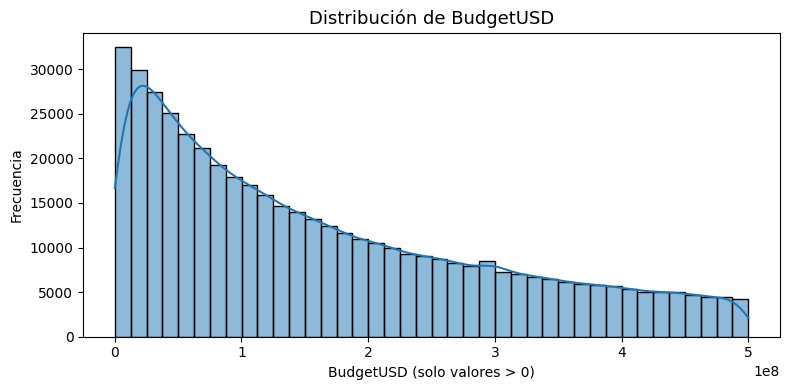

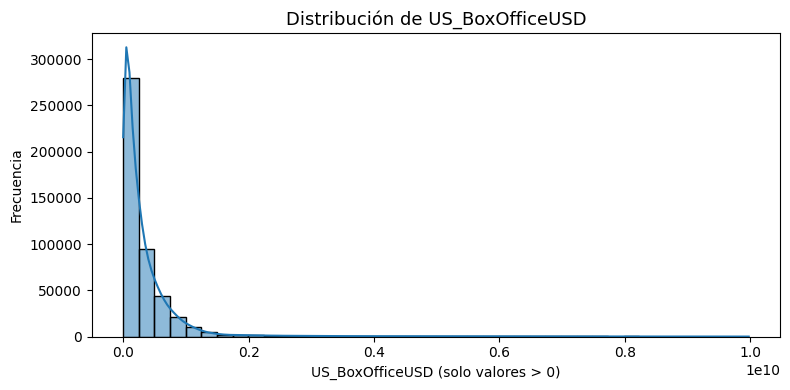

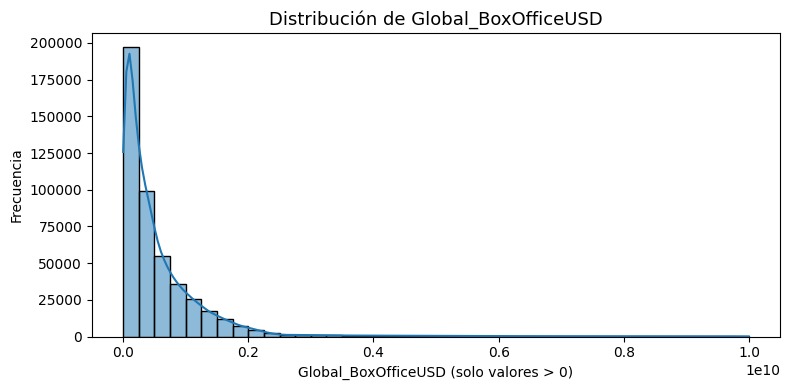

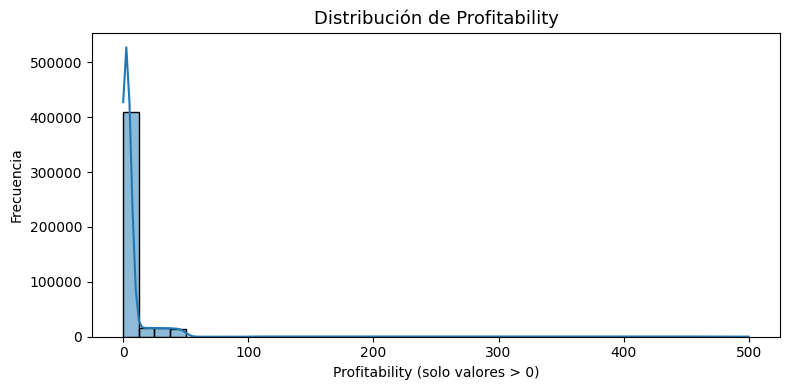

In [22]:
cols_numericas = ['BudgetUSD', 'US_BoxOfficeUSD', 'Global_BoxOfficeUSD', 'Profitability']

for col in cols_numericas:
    plt.figure(figsize=(8,4))
    sns.histplot(df[df[col] > 0][col], bins=40, kde=True)
    plt.title(f"Distribución de {col}", fontsize=13)
    plt.xlabel(f"{col} (solo valores > 0)")
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

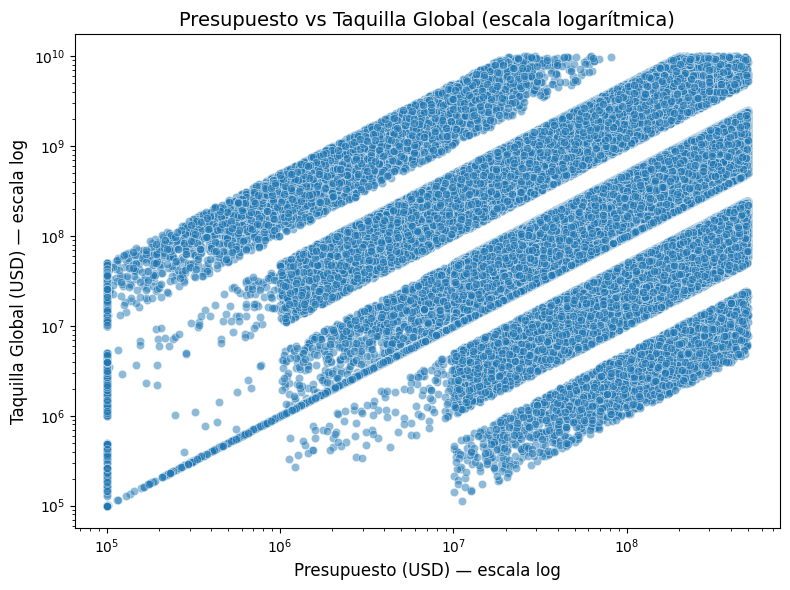

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='BudgetUSD', y='Global_BoxOfficeUSD', alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Presupuesto (USD) — escala log", fontsize=12)
plt.ylabel("Taquilla Global (USD) — escala log", fontsize=12)
plt.title("Presupuesto vs Taquilla Global (escala logarítmica)", fontsize=14)
plt.tight_layout()
plt.show()

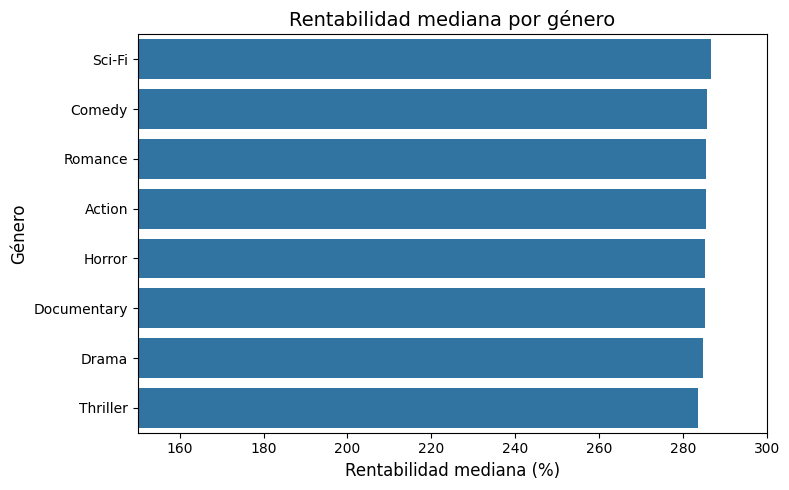

In [38]:
plt.figure(figsize=(8,5))
sns.barplot(x=rent_gen.values*100, y=rent_gen.index)
plt.xlabel("Rentabilidad mediana (%)", fontsize=12)
plt.ylabel("Género", fontsize=12)
plt.title("Rentabilidad mediana por género", fontsize=14)
plt.xlim(150, 300)
plt.tight_layout()
plt.show()

In [34]:
# Filtrar valores de rentabilidad extremos
df_limpio = df[(df['Profitability'] > 0.01) & (df['Profitability'] <= 10)].copy()

# Si quieres ver los peores casos también
print("Películas eliminadas por outliers:", len(df) - len(df_limpio))

Películas eliminadas por outliers: 61138


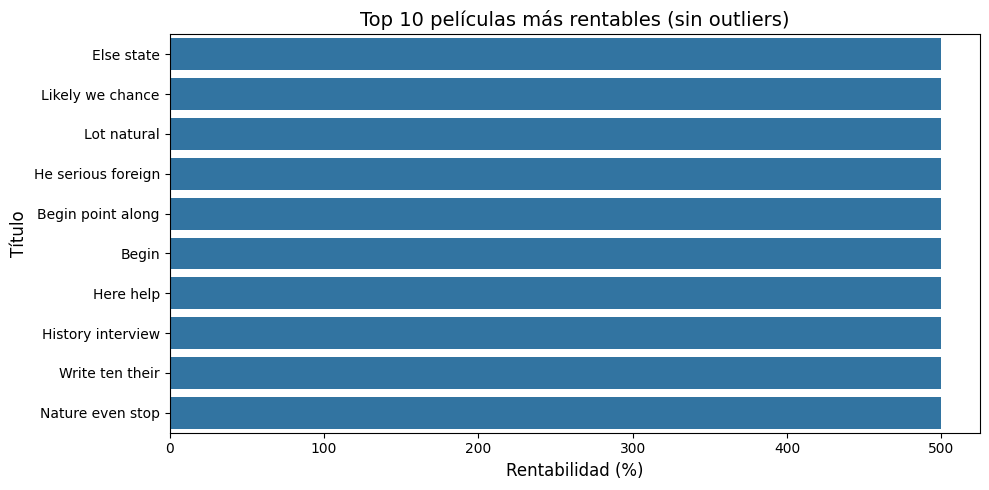

In [35]:
if 'Profitability' in df_limpio.columns:
    top10 = df_limpio.sort_values(by='Profitability', ascending=False).head(10)
    plt.figure(figsize=(10,5))
    sns.barplot(x=top10['Profitability']*100, y=top10['Title'])
    plt.xlabel("Rentabilidad (%)", fontsize=12)
    plt.ylabel("Título", fontsize=12)
    plt.title("Top 10 películas más rentables (sin outliers)", fontsize=14)
    plt.tight_layout()
    plt.show()

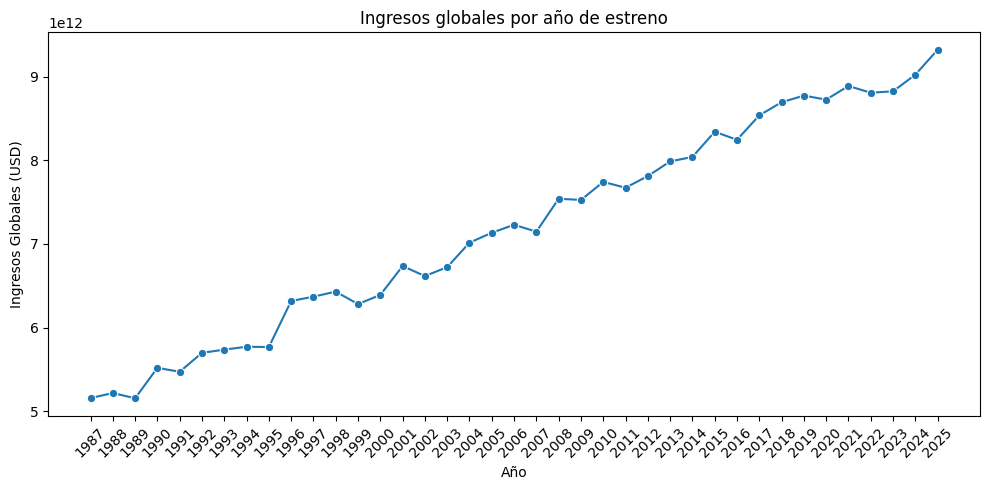

In [42]:
if 'ReleaseYear' in df_final_corregido.columns:
    ingresos_anio = df_final_corregido.groupby('ReleaseYear')['Global_BoxOfficeUSD'].sum().reset_index()
    plt.figure(figsize=(10,5))
    sns.lineplot(data=ingresos_anio, x='ReleaseYear', y='Global_BoxOfficeUSD', marker='o')
    plt.title("Ingresos globales por año de estreno")
    plt.xlabel("Año")
    plt.ylabel("Ingresos Globales (USD)")
    plt.xticks(ingresos_anio['ReleaseYear'].unique(), rotation=45)
    plt.tight_layout()
    plt.show()